# Capstone project 1: Predicting the number of visits in US neighborhoods

**Table of Content**
- Introduction
- Data Wrangling
- Conclusions

## Introduction

**Overview**
<p> For this project, I will be analyzing a dataset from SafeGraph and the US Census Bureau containing information about approx. 220'000 census block groups (CBG), the most granular level the US Census Bureau reports on. Information about CBGs include **popularity**, **distance traveled to a CBG**, **visits to places such as stores and restaurants**.
The dataset contains 13 columns with quite a significant amount of work before being analyzable. </p>

**Questions that can be answered by analyzing this dataset**
- What time do people visit certain census block groups (ex. Manhattan during the day vs. night)?
- What are the most popular brands in a neighborhood?
- Are there regional preferences for some brands over others?

**Possible applications**
<p> Restaurants, shops/store, companies, mayor of a city could be interested to know
which area attracts the most people to take decisions such as:</p>

- where to implement a new restaurant, shop, ... strategically (according to the brands also present in the area for example)?
- what type of business to implement in which area (depending on the amount of people during the day)?
- when to organize an event (depending on the amount of people per day): beginning, middle of week, or weekend?
- when and where do we need for public transportation (for a mayor, transportation company)?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator
import ast
from collections import Counter

## Data Wrangling

After importing the two datasets and observing their content, we will merge them, split some columns, remove unused columns and rows in order to have a clean dataset on which further analysis will be easier to perform and communication facilitated. 

### Step 1: Importing data and viewing it

**Summary of this step**

- import dataset 1 and 2, check type, shape, delete unnecessary columns, check null rows in key column "census_block_group"
- merge them to create one single dataset "common" containing 220331 rows and 13 columns

<b> Import CSV 'cbg_patterns.csv' </b>

In [2]:
pwd

'/Users/colinechabloz/Desktop/Springboard/Capstone Project 1/Analyzing brands per neighborhood/Mateo 9 august'

In [3]:
filename1 = '/Users/colinechabloz/Desktop/Datasets/cbg_patterns.csv'

In [4]:
#Reading the data from the original dataset
data1 = pd.read_csv(filename1, dtype={'census_block_group':str})

<b> Observe head </b>

In [5]:
data1.head()

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,010059508001,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,010090506011,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,010479572002,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,010690404001,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,010730112101,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


**Observations from the dataset**

- columns "data_range_start" and "data_range_end" seem to contain unique values, which would be useless. To check later 
- columns "visitor_home_cbgs", "visitor_work_cbgs", "popularity_by_day" have similar formats and will need to be split into more columns 
- columns "popularity_by_hour" will need to be split to be analyzed 
- the three columns related to brands "related_same_day_brand", "related_same_month_brand", "top_brands" contain information that needs to be extracted 

<b> Observe data shape </b>

In [6]:
data1.shape

(220735, 13)

<b> Observe type </b>

In [7]:
#Shows the type of every column in the dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220735 entries, 0 to 220734
Data columns (total 13 columns):
census_block_group          220734 non-null object
date_range_start            220735 non-null int64
date_range_end              220735 non-null int64
raw_visit_count             220629 non-null float64
raw_visitor_count           220629 non-null float64
visitor_home_cbgs           220735 non-null object
visitor_work_cbgs           220735 non-null object
distance_from_home          220518 non-null float64
related_same_day_brand      220735 non-null object
related_same_month_brand    220735 non-null object
top_brands                  220735 non-null object
popularity_by_hour          220735 non-null object
popularity_by_day           220735 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 21.9+ MB


**Observations from the dataset**

- "census_block_group": type 'object' is fine
- "raw_visit_count" and "raw_visitor_count": type 'float64' is fine 
- "visitor_home_cbgs", "visitor_work_cbgs": type 'object' is ok for the moment but will need to be converted to 'float64' later on, once the split will be done
- "distance_from_home": type 'float64' is fine 
- "related_same_day_brand", "related_same_month_brand", "top_brands": type 'object' is fine
- "popularity_by_hour", "popularity_by_day": type 'object' is ok for the moment but will need to be converted to 'float64' later on, once the split will be done

<b> Delete unnecessary columns </b>

In [8]:
del data1['date_range_start']
del data1['date_range_end']

**Check that columns have disappeared**

In [9]:
data1.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


<b> Check if there are <i> null </i> rows in key column  </b>

In [10]:
data1[data1['census_block_group'].isna()]

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
220734,NaN,NaN,NaN,{},{},NaN,[],[],[],[],{}


<b> Remove <i> null </i> row/s in key column </b>

In [11]:
data1 = data1.dropna(subset=['census_block_group'])

**Check that one row was removed**

In [12]:
data1.shape

(220734, 11)

<b> Check statistics </b>

In [13]:
data1.describe()

,raw_visit_count,raw_visitor_count,distance_from_home
count,2.206290e+05,2.206290e+05,2.205180e+05
mean,4.793066e+04,1.182032e+04,3.511280e+04
std,6.252655e+04,3.045832e+04,9.973193e+04
min,6.000000e+01,5.000000e+01,7.060000e+02
25%,1.704200e+04,3.430000e+03,8.584000e+03
50%,3.064000e+04,6.541000e+03,1.461400e+04
75%,5.667800e+04,1.309900e+04,3.139775e+04
max,7.179900e+06,6.113949e+06,6.297845e+06


<b> Import CSV 'cbg_geographic_data.csv' </b>

In [14]:
filename2 = '/Users/colinechabloz/Desktop/Datasets/cbg_geographic_data.csv'
data2 = pd.read_csv(filename2, dtype={'census_block_group':str})

<b> Observe head </b>

In [15]:
data2.head()

,census_block_group,amount_land,amount_water,latitude,longitude
0,010010201001,4254524.0,23431,32.465829,-86.489614
1,010010201002,5568295.0,0,32.485849,-86.489690
2,010010202001,2058380.0,0,32.480082,-86.474974
3,010010202002,1283506.0,5968,32.464435,-86.469766
4,010010203001,3866515.0,9054,32.480175,-86.460793


<b> Observe data shape </b>

In [16]:
data2.shape

(220333, 5)

<b> Observe type </b>

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220333 entries, 0 to 220332
Data columns (total 5 columns):
census_block_group    220333 non-null object
amount_land           220333 non-null float64
amount_water          220333 non-null int64
latitude              220333 non-null float64
longitude             220333 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.4+ MB


<b> Delete unnecessary columns </b>

In [18]:
del data2['amount_land']
del data2['amount_water']

Check that columns have disappeared

In [19]:
data2.head()

,census_block_group,latitude,longitude
0,010010201001,32.465829,-86.489614
1,010010201002,32.485849,-86.489690
2,010010202001,32.480082,-86.474974
3,010010202002,32.464435,-86.469766
4,010010203001,32.480175,-86.460793


In [20]:
data2.shape

(220333, 3)

<b> Check if there are <i> null </i> rows in key column  </b>

In [21]:
data2[data2['census_block_group'].isna()]

,census_block_group,latitude,longitude


<b> Check statistics </b>

In [22]:
data2.describe()

,latitude,longitude
count,220333.000000,220333.000000
mean,37.682385,-91.145732
std,5.518045,16.278313
min,17.901633,-175.860041
25%,33.986036,-97.595451
50%,38.920937,-86.723104
75%,41.480645,-79.396160
max,71.249841,178.338813


**Observations**

- data1 contains 220734 rows, data2 contains 220333 rows. This is a difference of 401 rows. 

I need to analyze 3 cases:
    <p> 1) Some rows are present in data1 and in data2 </p>
    <p> 2) Some rows are present in data1 and not in data2 </p>
    <p> 3) Some rows are present in data2 and not in data1 </p>

<b> Case 1) Some rows are present in data1 and in data2 </b>

In [23]:
s1 = data1.merge(data2)

In [24]:
s1.shape

(220331, 13)

220331 rows are in common between data1 and data2

In [25]:
s1[s1['census_block_group'].isna()]

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day,latitude,longitude


Second way to check common rows between data1 and data2

In [26]:
common = data1.merge(data2,on=['census_block_group'])

In [27]:
common.shape

(220331, 13)

In [28]:
common.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day,latitude,longitude
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550...",33.671800,-86.690610


<b> Case 2) Some rows are present in data1 and not in data2 </b>

In [29]:
#Convert cbg column in each dataset to set type to make set theory operations
s1 = set(data1['census_block_group'])
s2 = set(data2['census_block_group'])

In [30]:
#Find elements from s1 that are not present in s2
s3 = s1.difference(s2)
len(s3)

403

<b> Case 3) Some rows are present in data2 and not in data1 </b>

In [31]:
#Find elements from s2 that are not present in s1
s4 = s2.difference(s1)
len(s4)

2

**Observations from the dataset**

We now have a dataset 'common' containing 220331 rows and 13 columns. Column type has been checked and unnecessary columns have been deleted. 

### Step 2: Identify and group columns for first analysis

**Summary of this step**
<p> The goal of this step is to check the consistency of the data. With large datasets like the one we are working on, it is difficult to check the level of sanity of a column knowing the number of rows. 
I suggest to group the columns by similar format and to perform checks on a group of columns. </p> 

- Group 1_column "census_block_group": check that all CBGs are numbers of the same length and unique
- Group 2_columns "visitor_home_cbgs", "visitor_work_cbgs", "popularity_by_day": check that delimiter ":" is always in the same position
- Group 3_columns "raw_visit_count", "raw_visitor_count", "distance_from_home": check that all rows are numbers 
- Group 4_columns "related_same_day_brand", "related_same_month_brand", "top_brands": no particular check 
- Group 5_column "popularity_by_hour": no particular check

<b> Group 1: </b> Key column

<b> Select only column ‘census_block_group’ </b>

In [32]:
common_key = common[['census_block_group']].copy()

<b> Check that first character is a number and create a table counting the number of rows per first character </b>

In [33]:
common_key['first'] = common_key['census_block_group'].str[:1]

In [34]:
common_key.groupby('first').count()

,census_block_group
first,
0,39626
1,36970
2,38090
3,44430
4,41493
5,17128
7,2594


<b> Interpretation: </b> all cbgs start with a number in this range {0,1,2,3,4,5,7}, the majority starting with '3'

<b> Check that last character is a number and create a table counting the number of rows per last character </b>

In [35]:
common_key['last'] = common_key['census_block_group'].str[-1]

In [36]:
common_key.groupby('last')['last'].count()

last
0      598
1    73642
2    68035
3    45911
4    22073
5     7460
6     2082
7      452
8       67
9       11
Name: last, dtype: int64

<b> Interpretation: </b> all cbgs end with a number in this range {0:9}, the majority ending with '1'

<b> Check length </b>

In [37]:
common_key['slen'] = common_key['census_block_group'].str.len()

In [38]:
common_key.groupby('slen')['slen'].count()

slen
12    220331
Name: slen, dtype: int64

<b> Interpretation: </b> The key column contains 220331 rows, all of length '12' 

<b> Check that 'census_block_group' is a unique identifier </b>

In [39]:
common_key['census_block_group'].is_unique

True

<b> Group 2: </b> Columns starting with { </p>

<b> Select only columns ‘visitor_home_cbgs’, ‘visitor_work_cbgs’, and ‘popularity_by_day’ </b>

In [40]:
common_dict = common[['visitor_home_cbgs', 'visitor_work_cbgs', 'popularity_by_day']].copy()

<b> Add index </b>

In [41]:
common_dict['index_col'] = common_dict.index

Check that index column was added

In [42]:
common_dict['index_col'].head()

0    0
1    1
2    2
3    3
4    4
Name: index_col, dtype: int64

<b> Unpivot other columns than Index </b>

In [43]:
common_dict_melt = pd.melt(common_dict, id_vars=['index_col'])

In [44]:
common_dict_melt.head()

,index_col,variable,value
0,0,visitor_home_cbgs,"{""010059501003"":127,""010059509001"":111,""010059..."
1,1,visitor_home_cbgs,"{""010730113021"":210,""010090506022"":205,""010090..."
2,2,visitor_home_cbgs,"{""010479567011"":67,""010479567021"":60}"
3,3,visitor_home_cbgs,"{""010690402013"":370,""010690402011"":322,""010690..."
4,4,visitor_home_cbgs,"{""010090507001"":183,""010730113021"":167,""010730..."


<p> <b> Remove {} <b/> </p>

In [45]:
common_dict_melt['value'] = common_dict_melt['value'].map(lambda x: x.lstrip('{').rstrip('}'))

In [46]:
common_dict_melt.head()

,index_col,variable,value
0,0,visitor_home_cbgs,"""010059501003"":127,""010059509001"":111,""0100595..."
1,1,visitor_home_cbgs,"""010730113021"":210,""010090506022"":205,""0100905..."
2,2,visitor_home_cbgs,"""010479567011"":67,""010479567021"":60"
3,3,visitor_home_cbgs,"""010690402013"":370,""010690402011"":322,""0106904..."
4,4,visitor_home_cbgs,"""010090507001"":183,""010730113021"":167,""0107301..."


In [47]:
common_dict_melt.iloc[-5:]

,index_col,variable,value
660988,220326,popularity_by_day,
660989,220327,popularity_by_day,
660990,220328,popularity_by_day,
660991,220329,popularity_by_day,
660992,220330,popularity_by_day,


<b> Split column by delimiter ',' </b>

In [48]:
common_dict_melt_split = pd.concat([common_dict_melt, common_dict_melt['value'].str.split(',', expand=True)], axis=1)

In [49]:
common_dict_melt_split.head()

,index_col,variable,value,0,1,2,3,4,5,6,...,926,927,928,929,930,931,932,933,934,935
0,0,visitor_home_cbgs,"""010059501003"":127,""010059509001"":111,""0100595...","""010059501003"":127","""010059509001"":111","""010059509002"":106","""010059505001"":102","""010059506002"":92","""010059508002"":82","""010059505003"":64",...,None,None,None,None,None,None,None,None,None,None
1,1,visitor_home_cbgs,"""010730113021"":210,""010090506022"":205,""0100905...","""010730113021"":210","""010090506022"":205","""010090506024"":164","""010730115001"":145","""010730117041"":135","""010830212001"":130","""010730114004"":126",...,None,None,None,None,None,None,None,None,None,None
2,2,visitor_home_cbgs,"""010479567011"":67,""010479567021"":60","""010479567011"":67","""010479567021"":60",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,3,visitor_home_cbgs,"""010690402013"":370,""010690402011"":322,""0106904...","""010690402013"":370","""010690402011"":322","""010690402021"":275","""010690402022"":206","""010690409002"":201","""010690421002"":200","""010690401001"":177",...,None,None,None,None,None,None,None,None,None,None
4,4,visitor_home_cbgs,"""010090507001"":183,""010730113021"":167,""0107301...","""010090507001"":183","""010730113021"":167","""010730112071"":132","""010090507003"":129","""010730112061"":115","""010730112062"":110","""010730112051"":103",...,None,None,None,None,None,None,None,None,None,None


In [50]:
common_dict_melt_split.iloc[-3:]

,index_col,variable,value,0,1,2,3,4,5,6,...,926,927,928,929,930,931,932,933,934,935
660990,220328,popularity_by_day,,,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
660991,220329,popularity_by_day,,,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
660992,220330,popularity_by_day,,,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [51]:
del common_dict_melt_split['value']

In [52]:
common_dict_melt_split.head()

,index_col,variable,0,1,2,3,4,5,6,7,...,926,927,928,929,930,931,932,933,934,935
0,0,visitor_home_cbgs,"""010059501003"":127","""010059509001"":111","""010059509002"":106","""010059505001"":102","""010059506002"":92","""010059508002"":82","""010059505003"":64","""010059501002"":61",...,None,None,None,None,None,None,None,None,None,None
1,1,visitor_home_cbgs,"""010730113021"":210","""010090506022"":205","""010090506024"":164","""010730115001"":145","""010730117041"":135","""010830212001"":130","""010730114004"":126","""010830212002"":125",...,None,None,None,None,None,None,None,None,None,None
2,2,visitor_home_cbgs,"""010479567011"":67","""010479567021"":60",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,3,visitor_home_cbgs,"""010690402013"":370","""010690402011"":322","""010690402021"":275","""010690402022"":206","""010690409002"":201","""010690421002"":200","""010690401001"":177","""010670305003"":172",...,None,None,None,None,None,None,None,None,None,None
4,4,visitor_home_cbgs,"""010090507001"":183","""010730113021"":167","""010730112071"":132","""010090507003"":129","""010730112061"":115","""010730112062"":110","""010730112051"":103","""010730111103"":90",...,None,None,None,None,None,None,None,None,None,None


<b> Filter on 'visitor_home_cbgs' </b>

In [53]:
common_dict_melt_split_vis_home = common_dict_melt_split.loc[common_dict_melt_split['variable'] == 'visitor_home_cbgs']

In [54]:
common_dict_melt_split_vis_home.head()

,index_col,variable,0,1,2,3,4,5,6,7,...,926,927,928,929,930,931,932,933,934,935
0,0,visitor_home_cbgs,"""010059501003"":127","""010059509001"":111","""010059509002"":106","""010059505001"":102","""010059506002"":92","""010059508002"":82","""010059505003"":64","""010059501002"":61",...,None,None,None,None,None,None,None,None,None,None
1,1,visitor_home_cbgs,"""010730113021"":210","""010090506022"":205","""010090506024"":164","""010730115001"":145","""010730117041"":135","""010830212001"":130","""010730114004"":126","""010830212002"":125",...,None,None,None,None,None,None,None,None,None,None
2,2,visitor_home_cbgs,"""010479567011"":67","""010479567021"":60",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,3,visitor_home_cbgs,"""010690402013"":370","""010690402011"":322","""010690402021"":275","""010690402022"":206","""010690409002"":201","""010690421002"":200","""010690401001"":177","""010670305003"":172",...,None,None,None,None,None,None,None,None,None,None
4,4,visitor_home_cbgs,"""010090507001"":183","""010730113021"":167","""010730112071"":132","""010090507003"":129","""010730112061"":115","""010730112062"":110","""010730112051"":103","""010730111103"":90",...,None,None,None,None,None,None,None,None,None,None


In [55]:
common_dict_melt_split_vis_home_unpivot = pd.melt(common_dict_melt_split_vis_home, id_vars=['index_col','variable'])

In [56]:
common_dict_melt_split_vis_home_unpivot.head()

,index_col,variable,variable,value
0,0,0,0,"""010059501003"":127"
1,1,0,0,"""010730113021"":210"
2,2,0,0,"""010479567011"":67"
3,3,0,0,"""010690402013"":370"
4,4,0,0,"""010090507001"":183"


In [57]:
#calculate position of ':' for each row
# I should have "14" or "-1" or "NaN"
a = common_dict_melt_split_vis_home_unpivot['value'].str.find(':')

In [58]:
a.shape

(206229816,)

In [59]:
# try 1
np.unique(a)

array([-1., 14., nan, ..., nan, nan, nan])

In [60]:
# try 2
a.value_counts()

 14.0    4131721
-1.0       28032
Name: value, dtype: int64

In [61]:
# The sum of 14's and -1's is not the total, that means the other elements must be nans,
#so the number of Nans is equal to:
print("Nan:    " + str(a.shape[0] - 4131721 - 28032))

Nan:    202070063


<b> Filter on 'visitor_work_cbgs' </b>

In [62]:
common_dict_melt_split_vis_work = common_dict_melt_split.loc[common_dict_melt_split['variable'] == 'visitor_work_cbgs']

In [63]:
common_dict_melt_split_vis_work.shape

(220331, 938)

In [64]:
common_dict_melt_split_vis_work_unpivot = pd.melt(common_dict_melt_split_vis_work, id_vars=['index_col','variable'])

In [65]:
common_dict_melt_split_vis_work_unpivot.head()

,index_col,variable,variable,value
0,0,0,0,"""010059501003"":109"
1,1,0,0,"""010890111001"":271"
2,2,0,0,"""010479567021"":52"
3,3,0,0,"""010690402024"":313"
4,4,0,0,"""010730045001"":140"


In [66]:
#calculate position of ':' for each row
# I should have "14" or "-1" or "NaN"
b = common_dict_melt_split_vis_work_unpivot['value'].str.find(':')

In [67]:
b.head()

0    14.0
1    14.0
2    14.0
3    14.0
4    14.0
Name: value, dtype: float64

In [68]:
b.value_counts()

 14.0    1795704
-1.0       50756
Name: value, dtype: int64

In [69]:
#so the number of Nans is equal to:
print("Nan:    " + str(b.shape[0] - 1795704 - 50756))

Nan:    204383356


<b> Filter on 'popularity_by_day' </b>

In [70]:
common_dict_melt_split_pop_day = common_dict_melt_split.loc[common_dict_melt_split['variable'] == 'popularity_by_day']

In [71]:
common_dict_melt_split_pop_day.shape

(220331, 938)

In [72]:
common_dict_melt_split_pop_day_unpivot = pd.melt(common_dict_melt_split_pop_day, id_vars=['index_col','variable'])

In [73]:
common_dict_melt_split_pop_day_unpivot.head()

,index_col,variable,variable,value
0,0,0,0,"""Monday"":12000"
1,1,0,0,"""Monday"":12125"
2,2,0,0,"""Monday"":2314"
3,3,0,0,"""Monday"":21141"
4,4,0,0,"""Monday"":8402"


In [74]:
#calculate position of ':' for each row
# I should have "8,9,10,11" or "-1" or "NaN"
c = common_dict_melt_split_pop_day_unpivot['value'].str.find(':')

In [75]:
c.value_counts()

 8.0     660720
 10.0    440480
 11.0    220240
 9.0     220240
-1.0         91
Name: value, dtype: int64

In [76]:
#so the number of Nans is equal to:
print("Nan:    " + str(c.shape[0] - 660720 - 440480 - 220240 - 220240))

Nan:    204688136


<b> Check that there is a all days of week in each row, order is the same</b>

In [77]:
#dictionary containing regex to compare to strings in every column
#the regex checks is the string contains a 'Monday', followed by ':' and followed by a number,
#and that's how it works for every single element
regex_dict = {0: "\"Monday\"\:[0-9]+", 1: "\"Tuesday\"\:[0-9]+", 2: "\"Wednesday\"\:[0-9]+",
              3: "\"Thursday\"\:[0-9]+", 4: "\"Friday\"\:[0-9]+", 5 :"\"Saturday\"\:[0-9]+", 6: "\"Sunday\"\:[0-9]+"}

# boolean list containing assertion on correctness of format, that is, to check if the elements are written correctly
bool_list = []
for n in range(7): # iterates from 0 to 6
    
    day_column = common_dict_melt_split_pop_day[n]# gets the column corresponding to a day (0 is monday, 1 tuesday and so on)
    evaluated_array = day_column.dropna().str.contains(regex_dict[n])#deletes nan values to avoid false positives and
                                                                     #evaluates every row to check is the format is correct
                                                                     #Returns an array of boolean values the same length that the original dataset
                                                                     #True means it has the right format and False means 
                                                                     #it's either empty or badly formatted
    bool_list.append(np.all(evaluated_array))#Evaluates all values in boolean for every column and if all values of column
                                             #Are correctly formatted it returns a single True in a list, if even a single
                                             #value is false it returns False
                                             # Then those values are appended to a list, every value corresponding to a day

In [78]:
bool_list

[False, True, True, True, True, True, True]

So only the Monday column contains bad formatted values. Check what indexes are these values from:

In [79]:
monday_column = common_dict_melt_split_pop_day[0]
evaluated_monday_column = monday_column.dropna().str.contains(regex_dict[0])

In [80]:
#These are the values that cointain empty rows in 'Monday' column
np.where(evaluated_monday_column == False)

(array([220240, 220241, 220242, 220243, 220244, 220245, 220246, 220247,
        220248, 220249, 220250, 220251, 220252, 220253, 220254, 220255,
        220256, 220257, 220258, 220259, 220260, 220261, 220262, 220263,
        220264, 220265, 220266, 220267, 220268, 220269, 220270, 220271,
        220272, 220273, 220274, 220275, 220276, 220277, 220278, 220279,
        220280, 220281, 220282, 220283, 220284, 220285, 220286, 220287,
        220288, 220289, 220290, 220291, 220292, 220293, 220294, 220295,
        220296, 220297, 220298, 220299, 220300, 220301, 220302, 220303,
        220304, 220305, 220306, 220307, 220308, 220309, 220310, 220311,
        220312, 220313, 220314, 220315, 220316, 220317, 220318, 220319,
        220320, 220321, 220322, 220323, 220324, 220325, 220326, 220327,
        220328, 220329, 220330]),)

and those indices contain the value of an empty string ('')

In [81]:
monday_column.iloc[220240:220330]

660902     
660903     
660904     
660905     
660906     
660907     
660908     
660909     
660910     
660911     
660912     
660913     
660914     
660915     
660916     
660917     
660918     
660919     
660920     
660921     
660922     
660923     
660924     
660925     
660926     
660927     
660928     
660929     
660930     
660931     
         ..
660962     
660963     
660964     
660965     
660966     
660967     
660968     
660969     
660970     
660971     
660972     
660973     
660974     
660975     
660976     
660977     
660978     
660979     
660980     
660981     
660982     
660983     
660984     
660985     
660986     
660987     
660988     
660989     
660990     
660991     
Name: 0, Length: 90, dtype: object

<p> <b> Group 3: </b> Columns of type float </p>

<b> Select only columns ‘raw_visit_count’, ‘raw_visitor_count’, and ‘distance_from_home’ </b>

In [82]:
common_num = common[['raw_visit_count', 'raw_visitor_count', 'distance_from_home']].copy()

<b> Add index </b>

In [83]:
common_num['index_col'] = common_num.index

<b> Unpivot other columns than Index </b>

In [84]:
common_num_melt = pd.melt(common_num, id_vars=['index_col'])

In [85]:
common_num_melt.head()

,index_col,variable,value
0,0,raw_visit_count,75122.0
1,1,raw_visit_count,95649.0
2,2,raw_visit_count,14009.0
3,3,raw_visit_count,128169.0
4,4,raw_visit_count,51453.0


In [86]:
common_num_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660993 entries, 0 to 660992
Data columns (total 3 columns):
index_col    660993 non-null int64
variable     660993 non-null object
value        660654 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.1+ MB


In [87]:
common_num_melt.describe()

,index_col,value
count,660993.000000,6.606540e+05
mean,110165.000000,3.166037e+04
std,63604.129192,7.172509e+04
min,0.000000,5.000000e+01
25%,55082.000000,7.173000e+03
50%,110165.000000,1.498100e+04
75%,165248.000000,3.398100e+04
max,220330.000000,7.179900e+06


/Users/colinechabloz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/Users/colinechabloz/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/colinechabloz/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


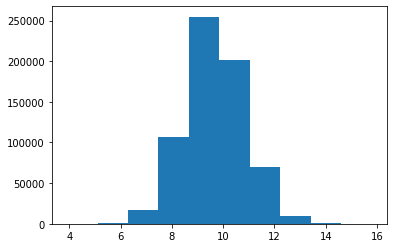

In [88]:
plt.hist(np.log(common_num_melt['value']))
plt.show()

<p> <b> Group 4: </b> Columns containing text of brands </p>

<b> Select only columns ‘related_same_day_brand’, ‘related_same_month_brand’, and ‘top_brands’ </b>

In [89]:
common_brand = common[['related_same_day_brand', 'related_same_month_brand', 'top_brands']].copy()

In [90]:
common_brand.head()

,related_same_day_brand,related_same_month_brand,top_brands
0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]"
1,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[]
2,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]"
3,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc..."
4,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]"


<p> <b> Group 5: </b> Column 'popularity_by_hour' </p>

<b> Select only columns ‘popularity_by_hour’ </b>

In [91]:
common_poph = common[['popularity_by_hour']]

In [92]:
common_poph.head()

,popularity_by_hour
0,"[2617,2457,2403,2519,2646,3007,3886,7566,5508,..."
1,"[6556,6325,6222,6355,6586,7350,8568,8099,7378,..."
2,"[807,790,796,786,851,951,1134,1797,1355,1241,1..."
3,"[2121,1828,1784,1704,1861,2373,3730,7497,7093,..."
4,"[3804,3716,3686,3672,3735,4115,4855,5946,4526,..."


**Observations from the dataset**

- All columns are in the right format and ready for the next step

### Step 3: Split, format, rename columns and deal with NaN values

**Summary of this step**

As we saw in Step 1, some columns require some splitting and information extraction because as such the data is not useful. These concerned columns are: "popularity_by_day", "popularity_by_hour", "visitor_home_cbgs", "visitor_work_cbgs". The goal of this step is therefore to:

- create several columns out of "popularity_by_day" and "popularity_by_hour"
- remove empty rows 
- create new columns calculating ratio of "popularit_by_day" and of "popularity_by_hour"
- append all new columns to the main dataset 
- extract COUNT, MAX, MIN, AVG from "visitor_home_cbgs" and "visitor_work_cbgs"

1) Column "popularity_by_hour"

In [93]:
#observe structure of column "popularity_by_hour"
common['popularity_by_hour'].head()

0    [2617,2457,2403,2519,2646,3007,3886,7566,5508,...
1    [6556,6325,6222,6355,6586,7350,8568,8099,7378,...
2    [807,790,796,786,851,951,1134,1797,1355,1241,1...
3    [2121,1828,1784,1704,1861,2373,3730,7497,7093,...
4    [3804,3716,3686,3672,3735,4115,4855,5946,4526,...
Name: popularity_by_hour, dtype: object

In [94]:
#split column popularity_by_hour into one column per hour
common.columns.str
common1 = pd.concat([common, common['popularity_by_hour'].str.split(',', 24, expand=True)], axis = 1)
common1.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,...,14,15,16,17,18,19,20,21,22,23
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...",...,6769,8389,7113,7199,6001,5513,4453,3886,3611,3008]
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...",...,8431,9784,10263,10830,9527,8885,8591,8240,7489,6930]
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...",...,1520,1695,1547,1511,1276,1122,1016,1000,924,866]
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...",...,13176,13719,13754,13973,12287,9946,7051,4825,3330,2539]
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...",...,4357,5631,6201,6547,5188,4647,4624,4412,4350,3988]


In [95]:
common1.shape

(220331, 37)

In [96]:
# keep only the number, remove []
common1[0] = common1[0].str.extract('(\d+)')
common1[23] = common1[23].str.extract('(\d+)')
common1.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,...,14,15,16,17,18,19,20,21,22,23
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...",...,6769,8389,7113,7199,6001,5513,4453,3886,3611,3008
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...",...,8431,9784,10263,10830,9527,8885,8591,8240,7489,6930
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...",...,1520,1695,1547,1511,1276,1122,1016,1000,924,866
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...",...,13176,13719,13754,13973,12287,9946,7051,4825,3330,2539
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...",...,4357,5631,6201,6547,5188,4647,4624,4412,4350,3988


In [97]:
#rename columns
common1.rename(columns={0: '12am', 1: '1am', 2: '2am', 3: '3am', 4: '4am', 5: '5am', 6: '6am', 7: '7am', 8: '8am', 9: '9am', 10: '10am', 11: '11am', 12: '12pm', 13: '1pm', 14: '2pm', 15: '3pm', 16: '4pm', 17: '5pm', 18: '6pm', 19: '7pm', 20: '8pm', 21: '9pm', 22: '10pm', 23: '11pm'}, inplace=True)
common1.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,...,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...",...,6769,8389,7113,7199,6001,5513,4453,3886,3611,3008
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...",...,8431,9784,10263,10830,9527,8885,8591,8240,7489,6930
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...",...,1520,1695,1547,1511,1276,1122,1016,1000,924,866
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...",...,13176,13719,13754,13973,12287,9946,7051,4825,3330,2539
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...",...,4357,5631,6201,6547,5188,4647,4624,4412,4350,3988


In [98]:
# delete original "popularity by hour" column
del common1['popularity_by_hour']

In [99]:
common1.shape

(220331, 36)

In [100]:
#check for empty rows
df1 = common1.iloc[:,12:36]
df1.head()

,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,...,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm
0,2617,2457,2403,2519,2646,3007,3886,7566,5508,5663,...,6769,8389,7113,7199,6001,5513,4453,3886,3611,3008
1,6556,6325,6222,6355,6586,7350,8568,8099,7378,7556,...,8431,9784,10263,10830,9527,8885,8591,8240,7489,6930
2,807,790,796,786,851,951,1134,1797,1355,1241,...,1520,1695,1547,1511,1276,1122,1016,1000,924,866
3,2121,1828,1784,1704,1861,2373,3730,7497,7093,8332,...,13176,13719,13754,13973,12287,9946,7051,4825,3330,2539
4,3804,3716,3686,3672,3735,4115,4855,5946,4526,4084,...,4357,5631,6201,6547,5188,4647,4624,4412,4350,3988


In [101]:
#Indexes where the empty columns are
df1[df1.isna().all(axis=1)].index

Int64Index([220240, 220241, 220242, 220243, 220244, 220245, 220246, 220247,
            220248, 220249, 220250, 220251, 220252, 220253, 220254, 220255,
            220256, 220257, 220258, 220259, 220260, 220261, 220262, 220263,
            220264, 220265, 220266, 220267, 220268, 220269, 220270, 220271,
            220272, 220273, 220274, 220275, 220276, 220277, 220278, 220279,
            220280, 220281, 220282, 220283, 220284, 220285, 220286, 220287,
            220288, 220289, 220290, 220291, 220292, 220293, 220294, 220295,
            220296, 220297, 220298, 220299, 220300, 220301, 220302, 220303,
            220304, 220305, 220306, 220307, 220308, 220309, 220310, 220311,
            220312, 220313, 220314, 220315, 220316, 220317, 220318, 220319,
            220320, 220321, 220322, 220323, 220324, 220325, 220326, 220327,
            220328, 220329, 220330],
           dtype='int64')

In [102]:
df1[df1.isna().all(axis=1)].shape

(91, 24)

91 rows are empty. Since these are unvaluable rows, I will delete the full 91 rows from my "common" dataset.

In [103]:
common2 = common1.drop(df1[df1.isna().all(axis=1)].index)
common2.shape

(220240, 36)

In [104]:
#Next two lines format the output so all the columns are visible when head() method is called
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
common2.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741,2617,2457,2403,2519,2646,3007,3886,7566,5508,5663,6004,6861,7411,6781,6769,8389,7113,7199,6001,5513,4453,3886,3611,3008
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514,6556,6325,6222,6355,6586,7350,8568,8099,7378,7556,7185,7404,7842,8300,8431,9784,10263,10830,9527,8885,8591,8240,7489,6930
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004,807,790,796,786,851,951,1134,1797,1355,1241,1272,1327,1524,1422,1520,1695,1547,1511,1276,1122,1016,1000,924,866
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331,2121,1828,1784,1704,1861,2373,3730,7497,7093,8332,10246,13083,15648,14525,13176,13719,13754,13973,12287,9946,7051,4825,3330,2539
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550...",33.671800,-86.690610,3804,3716,3686,3672,3735,4115,4855,5946,4526,4084,3923,4214,4290,4357,4357,5631,6201,6547,5188,4647,4624,4412,4350,3988


2) Column "popularity by day"

In [105]:
#Get a dataframe with the popularity by day
#dict(eval(x)) is the function that formats everything that way
pop_day = common2['popularity_by_day'].apply(lambda x : dict(eval(x))).apply(pd.Series)
pop_day.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,12000,12224,10626,9923,12116,9516,8717
1,12125,12984,12712,11270,14922,17203,14433
2,2314,2340,2195,1841,2076,1707,1536
3,21141,21143,17546,16578,19793,17794,14174
4,8402,8414,8550,6964,7633,5993,5497


In [106]:
pop_day.shape

(220240, 7)

Check for empty rows

In [107]:
pop_day[pop_day.isna().all(axis=1)].index

Int64Index([], dtype='int64')

In [108]:
pop_day[pop_day.isna().all(axis=1)].shape

(0, 7)

In [109]:
common2.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741,2617,2457,2403,2519,2646,3007,3886,7566,5508,5663,6004,6861,7411,6781,6769,8389,7113,7199,6001,5513,4453,3886,3611,3008
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514,6556,6325,6222,6355,6586,7350,8568,8099,7378,7556,7185,7404,7842,8300,8431,9784,10263,10830,9527,8885,8591,8240,7489,6930
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004,807,790,796,786,851,951,1134,1797,1355,1241,1272,1327,1524,1422,1520,1695,1547,1511,1276,1122,1016,1000,924,866
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331,2121,1828,1784,1704,1861,2373,3730,7497,7093,8332,10246,13083,15648,14525,13176,13719,13754,13973,12287,9946,7051,4825,3330,2539
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550...",33.671800,-86.690610,3804,3716,3686,3672,3735,4115,4855,5946,4526,4084,3923,4214,4290,4357,4357,5631,6201,6547,5188,4647,4624,4412,4350,3988


No empty rows.

#### Calculate the ratio of visitors per week and per day
<p> 1) First, popularity_by_day </p>

In [110]:
data4 = pop_day.loc[:,["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]
data4['counter'] = range(len(data4))
data4.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,counter
0,12000,12224,10626,9923,12116,9516,8717,0
1,12125,12984,12712,11270,14922,17203,14433,1
2,2314,2340,2195,1841,2076,1707,1536,2
3,21141,21143,17546,16578,19793,17794,14174,3
4,8402,8414,8550,6964,7633,5993,5497,4


In [111]:
data5=pd.melt(data4, id_vars="counter").groupby(["counter"],axis=0).sum()

In [112]:
data5.head()

,value
counter,
0,75122
1,95649
2,14009
3,128169
4,51453


In [113]:
data6=data4.iloc[:,0:7].div(data5["value"],axis=0)
data6.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038
1,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895
2,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644
3,0.164946,0.164962,0.136897,0.129345,0.154429,0.138832,0.110588
4,0.163295,0.163528,0.166171,0.135347,0.148349,0.116475,0.106835



<p> Another way to calculate pop_day (Without heavy resources consuming funtion melt() </p>

In [114]:
week_list = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

In [115]:
data4 = pop_day.loc[:, week_list]# Gets all columns from Monday to Sunday
week_total = data4.sum(axis = 1, skipna = True) #Gets the total sum of every element in a row
                                                #That is, the total number of visits per week

In [116]:
#get a week total to then divide every day by it
week_total.shape

(220240,)

In [117]:
data4.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,12000,12224,10626,9923,12116,9516,8717
1,12125,12984,12712,11270,14922,17203,14433
2,2314,2340,2195,1841,2076,1707,1536
3,21141,21143,17546,16578,19793,17794,14174
4,8402,8414,8550,6964,7633,5993,5497


In [118]:
#To find the ratio of visits in a day, we simply divide the visits in a day with the total of visits in that week (Which is in week total)
data4 = data4.loc[:,week_list].div(week_total, axis = 0)


In [119]:
#change column names to append without problem to main dataset
data4.rename(columns={"Monday": "Monday(ratio)", "Tuesday": "Tuesday(ratio)", "Wednesday": "Wednesday(ratio)", "Thursday": "Thursday(ratio)", "Friday": "Friday(ratio)", "Saturday": "Saturday(ratio)", "Sunday": "Sunday(ratio)"}, inplace=True)



<p> The type of all the columns is float: </p>

In [120]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220240 entries, 0 to 220239
Data columns (total 7 columns):
Monday(ratio)       220240 non-null float64
Tuesday(ratio)      220240 non-null float64
Wednesday(ratio)    220240 non-null float64
Thursday(ratio)     220240 non-null float64
Friday(ratio)       220240 non-null float64
Saturday(ratio)     220240 non-null float64
Sunday(ratio)       220240 non-null float64
dtypes: float64(7)
memory usage: 13.4 MB


<p> 2) Popularity per hour </p>

In [121]:
hour_list = ['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']

In [122]:
#Get only columns corresponding to visits per hour
data7 = common2.loc[:,hour_list]

<p> Columns are not float type </p>

In [123]:
data7.head()

,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm
0,2617,2457,2403,2519,2646,3007,3886,7566,5508,5663,6004,6861,7411,6781,6769,8389,7113,7199,6001,5513,4453,3886,3611,3008
1,6556,6325,6222,6355,6586,7350,8568,8099,7378,7556,7185,7404,7842,8300,8431,9784,10263,10830,9527,8885,8591,8240,7489,6930
2,807,790,796,786,851,951,1134,1797,1355,1241,1272,1327,1524,1422,1520,1695,1547,1511,1276,1122,1016,1000,924,866
3,2121,1828,1784,1704,1861,2373,3730,7497,7093,8332,10246,13083,15648,14525,13176,13719,13754,13973,12287,9946,7051,4825,3330,2539
4,3804,3716,3686,3672,3735,4115,4855,5946,4526,4084,3923,4214,4290,4357,4357,5631,6201,6547,5188,4647,4624,4412,4350,3988


In [124]:
#Get rid of '[]' characters at the beginning and at the end of the data
data7['12am'] = data7['12am'].str.extract('(\d+)')
data7['11pm'] = data7['11pm'].str.extract('(\d+)')

<p> Convert all columns to float </p>

In [125]:
#Convert to float in order to make operations with them
data7 = data7.astype(float)

In [126]:
#Check everything is converted to float
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220240 entries, 0 to 220239
Data columns (total 24 columns):
12am    220240 non-null float64
1am     220240 non-null float64
2am     220240 non-null float64
3am     220240 non-null float64
4am     220240 non-null float64
5am     220240 non-null float64
6am     220240 non-null float64
7am     220240 non-null float64
8am     220240 non-null float64
9am     220240 non-null float64
10am    220240 non-null float64
11am    220240 non-null float64
12pm    220240 non-null float64
1pm     220240 non-null float64
2pm     220240 non-null float64
3pm     220240 non-null float64
4pm     220240 non-null float64
5pm     220240 non-null float64
6pm     220240 non-null float64
7pm     220240 non-null float64
8pm     220240 non-null float64
9pm     220240 non-null float64
10pm    220240 non-null float64
11pm    220240 non-null float64
dtypes: float64(24)
memory usage: 42.0 MB


In [127]:
data7.head()

,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm
0,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0
1,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0
2,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0
3,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0
4,3804.0,3716.0,3686.0,3672.0,3735.0,4115.0,4855.0,5946.0,4526.0,4084.0,3923.0,4214.0,4290.0,4357.0,4357.0,5631.0,6201.0,6547.0,5188.0,4647.0,4624.0,4412.0,4350.0,3988.0


In [128]:
#The sum of all the elements in a row  (every hour) giving the total in a day
day_total = data7.sum(axis = 1, skipna = True)

In [129]:
day_total.head()

0    121271.0
1    190696.0
2     28530.0
3    186425.0
4    108868.0
dtype: float64

In [130]:
#Find the ratio of every hour dividing the value of every hour with the day_total
data8 = data7.loc[:,hour_list].div(day_total, axis = 0)


In [131]:
data8.head()

,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm
0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804
1,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341
2,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354
3,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619
4,0.034941,0.034133,0.033858,0.033729,0.034308,0.037798,0.044595,0.054617,0.041573,0.037513,0.036034,0.038707,0.039406,0.040021,0.040021,0.051723,0.056959,0.060137,0.047654,0.042685,0.042473,0.040526,0.039957,0.036632


In [132]:
#change column names to append without problem to main dataset
data8.rename(columns={  "12am": "12am(ratio)", "1am": "1am(ratio)", "2am": "2am(ratio)", "3am": "3am(ratio)", "4am": "4am(ratio)", "5am": "5am(ratio)", "6am": "6am(ratio)", "7am": "7am(ratio)", "8am": "8am(ratio)", "8am": "8am(ratio)", "9am": "9am(ratio)", "10am": "10am(ratio)", "11am": "11am(ratio)", "12pm": "12m(ratio)", "1pm": "1pm(ratio)", "2pm": "2pm(ratio)", "3pm": "3pm(ratio)", "4pm": "4pm(ratio)", "5pm": "5pm(ratio)", "6pm": "6pm(ratio)", "7pm": "7pm(ratio)", "8pm": "8pm(ratio)", "9pm": "9pm(ratio)", "10pm": "10pm(ratio)", "11pm": "11pm(ratio)"}, inplace=True)


In [133]:
data8.head()

,12am(ratio),1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio)
0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804
1,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341
2,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354
3,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619
4,0.034941,0.034133,0.033858,0.033729,0.034308,0.037798,0.044595,0.054617,0.041573,0.037513,0.036034,0.038707,0.039406,0.040021,0.040021,0.051723,0.056959,0.060137,0.047654,0.042685,0.042473,0.040526,0.039957,0.036632


Delete string version od pop_hour in common2:

In [134]:
common2.shape

(220240, 36)

In [135]:
common2.drop(hour_list,axis = 1, inplace = True)

In [136]:
common2.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550...",33.671800,-86.690610


Append float version of popularity by hour to common2

In [137]:
common3 = pd.concat([common2, data7], axis = 1, ignore_index= False, sort=False)

In [138]:
common3.shape

(220240, 36)

Append ratio version of popularity by hour to common2

In [139]:
 common3 = pd.concat([common3, data8], axis = 1, ignore_index= False, sort=False)


In [140]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am(ratio),1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio)
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550...",33.671800,-86.690610,3804.0,3716.0,3686.0,3672.0,3735.0,4115.0,4855.0,5946.0,4526.

Append float version of popularity by day to common2

In [141]:
common3 = pd.concat([common3, pop_day], axis = 1, ignore_index= False, sort=False)
common3.head()


,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am(ratio),1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart""

In [142]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am(ratio),1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart""

Append "popularity by day (ratio)"

In [143]:
common3 = pd.concat([common3, data4], axis = 1, ignore_index= False, sort=False)

In [144]:
common3.shape

(220240, 74)

In [145]:
del common3['popularity_by_day']

In [146]:
common3.shape

(220240, 73)

3) Column "visitor_home_cbgs"

In [147]:
#Get a copy of the column
test = common3['visitor_home_cbgs'].copy()

In [148]:
test.head()

0    {"010059501003":127,"010059509001":111,"010059...
1    {"010730113021":210,"010090506022":205,"010090...
2                {"010479567011":67,"010479567021":60}
3    {"010690402013":370,"010690402011":322,"010690...
4    {"010090507001":183,"010730113021":167,"010730...
Name: visitor_home_cbgs, dtype: object

In [149]:
test_2 = test.iloc[0]

In [150]:
#check structure of one row
print(test_2)

{"010059501003":127,"010059509001":111,"010059509002":106,"010059505001":102,"010059506002":92,"010059508002":82,"010059505003":64,"010059501002":61,"010059507002":58,"010690402011":57,"010690402021":56,"132399603002":51,"130619603001":51,"010670303001":50}


<b>Convert everything to dict type</b>

In [152]:
#Since 'visitor_home_cbgs' is a string, to make operations with it we need to convert it to a dict object
#that's what ast.literal_eval() does
test = test.apply(lambda x : ast.literal_eval(x)) 

In [153]:
test.shape

(220240,)

In [154]:
test_2 = test.iloc[0]

<b>Find if elements are the correct type for the data set</b>

In [155]:
#The elements have been corrected to the correct format
print(type(test_2))

<class 'dict'>


<b>Find if elements are the correct type for the data set</b>

In [156]:
type(test.iloc[0]['010059501003'])

int

<b>Since they are, test column can be appended to main dataframe</b>
<p>First, delete original column 'visitor cbgs' with string type</p>

In [157]:
del common3['visitor_home_cbgs']

In [158]:
common3 = pd.concat([common3,test],axis = 1, ignore_index= False, sort=False)

In [159]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am(ratio),1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs
0,010059508001,75122.0,18314.0,"{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01..."
1,010090506011,95649.0,38942.0,"{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01..."
2,010479572002,14009.0,3039.0,"{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}"
3,010690404001,128169.0,25418.0,"{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174,0.164946,0.164962,0.136897,0.129345,0.154429,0.138832,0.110588,"{'010690402013': 370, '010690402011': 322, '01..."
4,010730112101,51453.0,9499.0,"{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight D

<p>Create column with the number of visitor home cbgs visitings a given cbg</p>

In [160]:
common3['vis_home_cbgs_count'] = test.apply(lambda x: len(x))

In [161]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am(ratio),1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count
0,010059508001,75122.0,18314.0,"{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14
1,010090506011,95649.0,38942.0,"{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69
2,010479572002,14009.0,3039.0,"{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2
3,010690404001,128169.0,25418.0,"{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174,0.164946,0.164962,0.136897,0.129345,0.154429,0.138832,0.110588,"{'010690402013': 370, '010690402011': 322, '01...",92
4,010730112101,51453.0,9499.0,"{""010730045001"":140,""010730027001"":123,""010730...",188

<p>Create column with the visitor home cbg where the highest amount of visitors come:</p>

In [162]:
common3['vis_home_most_visits_from'] = test.apply(lambda x: max(x.items(), key=operator.itemgetter(1))[0] if x else None)


In [163]:
common3['vis_home_most_visits_from'].iloc[0:10]

0    010059501003
1    010730113021
2    010479567011
3    010690402013
4    010090507001
5    010970063011
6    010890028021
7    011150403001
8    020200027114
9            None
Name: vis_home_most_visits_from, dtype: object

<p>Create column with the visitor home cbg where the lowest amount of visitors come (but visitors are higher than zero):</p>

In [164]:
common3['vis_home_least_visits_from'] = test.apply(lambda x: min(x.items(), key=operator.itemgetter(1))[0] if x else None)

In [165]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am(ratio),1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from
0,010059508001,75122.0,18314.0,"{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14,010059501003,010670303001
1,010090506011,95649.0,38942.0,"{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69,010730113021,010090507001
2,010479572002,14009.0,3039.0,"{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2,010479567011,010479567021
3,010690404001,128169.0,25418.0,"{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174,0.164946,0.164962,0.136897,0.129345,0.154429,0.138832,0.110588,"{'01069040201

<p>Create column with the average amount of visitors from all cbgs in 'visitor_home_cbgs':</p>

In [166]:
#to find the average, first find the total amount of visitors (sum(list(x.values()))
#the divide it by the amount of cbgs where that cbg gets visits from (len(x))
common3['avg_vis_home_visitors'] = test.apply(lambda x: sum(list(x.values()))/len(x) if x else 0)

In [167]:
 common3.head(5)

,census_block_group,raw_visit_count,raw_visitor_count,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am(ratio),1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors
0,010059508001,75122.0,18314.0,"{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14,010059501003,010670303001,76.285714
1,010090506011,95649.0,38942.0,"{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69,010730113021,010090507001,80.623188
2,010479572002,14009.0,3039.0,"{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2,010479567011,010479567021,63.500000
3,010690404001,128169.0,25418.0,"{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174,0.164946,0.164962,0.13689

4) Column "visitor_work_cbgs"

In [168]:
vis_work_cp = common3['visitor_work_cbgs'].copy()

In [169]:
vis_work_cp = vis_work_cp.apply(lambda x : ast.literal_eval(x))

In [170]:
del common3['visitor_work_cbgs']

In [171]:
#append 'visitor_home_cbgs'  with the correct type to main dataset 
common3 = pd.concat([common3,vis_work_cp],axis = 1, ignore_index= False, sort=False)

In [172]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am(ratio),1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors,visitor_work_cbgs
0,010059508001,75122.0,18314.0,194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14,010059501003,010670303001,76.285714,"{'010059501003': 109, '010810407002': 62, '010..."
1,010090506011,95649.0,38942.0,120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69,010730113021,010090507001,80.623188,"{'010890111001': 271, '010730045001': 269, '01..."
2,010479572002,14009.0,3039.0,67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2,010479567011,010479567021,63.500000,{'010479567021': 52}
3,010690404001,128169.0,25418.0,42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174,0.164946,0.164962,0.136897,0.129345,0.154429,0.138832,0.110588,"{'010690402013': 370, '01069040

In [173]:
#Append column with the count of the cbgs that visit the cbg from the row to main dataset
common3['vis_work_cbgs_count'] = vis_work_cp.apply(lambda x: len(x))

In [174]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am(ratio),1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors,visitor_work_cbgs,vis_work_cbgs_count
0,010059508001,75122.0,18314.0,194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14,010059501003,010670303001,76.285714,"{'010059501003': 109, '010810407002': 62, '010...",4
1,010090506011,95649.0,38942.0,120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69,010730113021,010090507001,80.623188,"{'010890111001': 271, '010730045001': 269, '01...",41
2,010479572002,14009.0,3039.0,67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2,010479567011,010479567021,63.500000,{'010479567021': 52},1
3,010690404001,128169.0,25418.0,42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174,0.164946,0.164962,0.136897,0.129345,0.154429,0.138832,0.110588,"{'01

In [175]:
#Finds the  cbg where the most visits come from (that is max()) for every row
#key=operator.itemgetter(1))[0] is to serach only in the values element of the
#row (key: cbg, value : visit count), since it is an object with more info
common3['vis_work_most_visits_from'] = vis_work_cp.apply(lambda x: max(x.items(), key=operator.itemgetter(1))[0] if x else None)


In [176]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am(ratio),1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors,visitor_work_cbgs,vis_work_cbgs_count,vis_work_most_visits_from
0,010059508001,75122.0,18314.0,194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14,010059501003,010670303001,76.285714,"{'010059501003': 109, '010810407002': 62, '010...",4,010059501003
1,010090506011,95649.0,38942.0,120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69,010730113021,010090507001,80.623188,"{'010890111001': 271, '010730045001': 269, '01...",41,010890111001
2,010479572002,14009.0,3039.0,67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2,010479567011,010479567021,63.500000,{'010479567021': 52},1,010479567021
3,010690404001,128169.0,25418.0,42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174,0.1

In [177]:
#Same that the method above but to find the least visits (min())
common3['vis_work_least_visits_from'] = vis_work_cp.apply(lambda x: min(x.items(), key=operator.itemgetter(1))[0] if x else None)

In [178]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am(ratio),1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors,visitor_work_cbgs,vis_work_cbgs_count,vis_work_most_visits_from,vis_work_least_visits_from
0,010059508001,75122.0,18314.0,194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14,010059501003,010670303001,76.285714,"{'010059501003': 109, '010810407002': 62, '010...",4,010059501003,010690402024
1,010090506011,95649.0,38942.0,120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69,010730113021,010090507001,80.623188,"{'010890111001': 271, '010730045001': 269, '01...",41,010890111001,010770109003
2,010479572002,14009.0,3039.0,67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2,010479567011,010479567021,63.500000,{'010479567021': 52},1,010479567021,010479567021
3,010690404001,128169.0,25418.0,42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.0258

In [179]:
common3['avg_vis_work_visitors'] = vis_work_cp.apply(lambda x: sum(list(x.values()))/len(x) if x else 0)

In [180]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am(ratio),1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors,visitor_work_cbgs,vis_work_cbgs_count,vis_work_most_visits_from,vis_work_least_visits_from,avg_vis_work_visitors
0,010059508001,75122.0,18314.0,194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14,010059501003,010670303001,76.285714,"{'010059501003': 109, '010810407002': 62, '010...",4,010059501003,010690402024,70.000000
1,010090506011,95649.0,38942.0,120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69,010730113021,010090507001,80.623188,"{'010890111001': 271, '010730045001': 269, '01...",41,010890111001,010770109003,93.756098
2,010479572002,14009.0,3039.0,67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2,010479567011,010479567021,63.500000,{'010479567021': 52},1,010479567021,010479567021,52.000000
3,010690404001,128169.0,25418.0,42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590

In [181]:
common3.shape

(220240, 81)

In [182]:
common3.shape

(220240, 81)

**Observations from the dataset**

All columns are now cleaned, and split into new columns that will be used for our analysis. "common3" contains now 220'240 rows and 81 columns and is free of empty rows. 

### Step 4: Identify Top ten brands for each column

**Summary of this step**

The goal of this step is to focus on the three columns regarding brands which are: "related_same_day_brand", "related_same_month_brand", "top_brands" and extract information of the top 10 brands. In the end, we will have the following dataframes:

- "common3" containing the main data, 
- "brand_day_df" containing the top 10 brands per day
- "brand_month_df" containing the top 10 brands per month
- "top_brands_df" containing the top 10 brands overall

<p>First convert columns to the right format</p>

In [183]:
def clean_brands(brands_list):
    """Removes spaces and punctuation from every single brand in the dataset, also makes all letters lowercase"""
    return [brand.replace(" ", "").replace("\'","").lower() for brand in brands_list]
            
def count_brands_frequency(brands_list,brands_dict):
    """Finds the amount of times a brand has appeared in the dataset as a dict with the format{brand : frequency}"""
    for brand in brands_list:#For every brand in the row
        if brand in brands_dict:# If the brand has appeared before
            brands_dict[brand] += 1 #adds 1 to the times the brand has appeared in the dataset
        else: #If it's the first time the brand has appeared
            brands_dict.update({brand : 1})#add the brand to the dictionary of brands a give it a count of 1
            
def find_top_x_brands(dataframe,number):
    """Finds most popular brands"""
    brands_dict = dict()
    dataframe.apply(lambda brands_list : count_brands_frequency(brands_list, brands_dict))# Find the frequency of each brand
    counter = Counter(brands_dict) #Type convertion needed to sort the elements considering a dict in python has no order
    top_x = counter.most_common(number) #Find top x brands
    top_x = [elem[0] for elem in top_x] #return only the brand and not the count
    
    return top_x

#Same as the method above, only the last line is different
def find_top_x_brands_with_vals(dataframe,number):
    """Finds most popular brands and the frequency"""
    brands_dict = dict()
    dataframe.apply(lambda brands_list : count_brands_frequency(brands_list, brands_dict))
    counter = Counter(brands_dict)
    top_x = counter.most_common(number)#Returns the count
    
    return top_x


In [185]:
#Same as before, the data is in str format so we convert it to a type where we can make operations with it (list)
common3['related_same_day_brand']  = common3['related_same_day_brand'].apply(lambda x : ast.literal_eval(x))


In [186]:
#Delete punctuation and spaces from brands, and make them all lowercases, next 4 rows do the same for the 
#detailed columns
common3['related_same_day_brand']  = common3['related_same_day_brand'].apply(lambda x : clean_brands(x) if x else [])


In [187]:
common3['related_same_month_brand'] = common3['related_same_month_brand'].apply(lambda x : ast.literal_eval(x))

In [188]:
common3['related_same_month_brand'] = common3['related_same_month_brand'].apply(lambda x : clean_brands(x) if x else [])


In [189]:
common3['top_brands']               = common3['top_brands'].apply(lambda x : ast.literal_eval(x))

In [190]:
common3['top_brands']               = common3['top_brands'].apply(lambda x : clean_brands(x) if x else [])

<p>Now make all brands lowercase and punctuation-less</p>

In [191]:
top_10_list_day_names =find_top_x_brands(common3['related_same_day_brand'],10)

In [192]:
top_10_list_day_names

['mcdonalds',
 'walmart',
 'dunkindonuts',
 'dollargeneral',
 'starbucks',
 'shelloil',
 'sonic',
 'quiktrip',
 '7-elevenus',
 'caseysgeneralstores']

In [198]:
def create_df_brands(timeframe,top_10):
    """Creates a datafrme where the top 10 brands are columns and 1 or 0 represent if they are in the top brands of a given cbg"""
    brand_df = pd.DataFrame() #Create an empty dataset to work with it later
    brand_df['census_block_group'] = common3['census_block_group'].copy()
    brand_column = pd.Series() #Create an empty dataset to work with it later
    
    for brand in top_10:
    #First create the empty column for the brand in the df brand_day_df
        brand_column = np.nan #np.nan is to fill the values since it's necessary taht the column has values
    #Then, checks whether the brand is on the list of brands in every row and puts a 0 or 1 depending the result
        brand_column = common3[timeframe].apply(lambda list_b : 1 if brand in list_b else 0)
    #finally, append to brand_day_df
        brand_df = pd.concat([brand_df,brand_column],axis = 1, ignore_index= False, sort=False)
    brand_df.columns = ['census_block_group'] + top_10
        
    return brand_df

In [199]:
brand_day_df = create_df_brands('related_same_day_brand',top_10_list_day_names)#datagrame for 'related_same_day_brand' column

In [200]:
brand_day_df.head()

,census_block_group,mcdonalds,walmart,dunkindonuts,dollargeneral,starbucks,shelloil,sonic,quiktrip,7-elevenus,caseysgeneralstores
0,010059508001,1,1,0,0,0,0,0,0,0,0
1,010090506011,1,0,0,0,0,1,0,0,0,0
2,010479572002,0,0,0,1,0,0,0,0,0,0
3,010690404001,0,1,0,1,0,0,0,0,0,0
4,010730112101,0,1,0,0,0,0,0,0,0,0


<p>Top ten brands for month</p>

In [201]:
top_10_list_month_names = find_top_x_brands(common3['related_same_month_brand'],10)

In [202]:
top_10_list_month_names

['mcdonalds',
 'walmart',
 'subway',
 'starbucks',
 'shelloil',
 'dollargeneral',
 'target',
 'dunkindonuts',
 'walgreens',
 'chick-fil-a']

In [203]:
brand_month_df =  create_df_brands('related_same_month_brand',top_10_list_month_names)

In [204]:
brand_month_df.head()

,census_block_group,mcdonalds,walmart,subway,starbucks,shelloil,dollargeneral,target,dunkindonuts,walgreens,chick-fil-a
0,010059508001,1,1,1,0,1,1,0,0,0,1
1,010090506011,1,1,1,0,1,1,0,0,0,1
2,010479572002,1,1,1,0,1,1,0,0,0,0
3,010690404001,1,1,0,0,0,1,0,0,0,1
4,010730112101,1,1,1,0,1,1,0,0,0,1


<p>Top ten brands for all time measured</p>

In [205]:
top_10_list_top_names = find_top_x_brands(common3['top_brands'],10)

In [206]:
top_10_list_top_names

['unitedstatespostalservice(usps)',
 'subway',
 'dollargeneral',
 'mcdonalds',
 'shelloil',
 'cricketwireless',
 'starbucks',
 'familydollarstores',
 'theamericanlegion',
 'walgreens']

In [207]:
brand_top_df =  create_df_brands('top_brands',top_10_list_top_names)

In [208]:
brand_top_df.head()

,census_block_group,unitedstatespostalservice(usps),subway,dollargeneral,mcdonalds,shelloil,cricketwireless,starbucks,familydollarstores,theamericanlegion,walgreens
0,010059508001,0,0,0,0,0,0,0,0,0,0
1,010090506011,0,0,0,0,0,0,0,0,0,0
2,010479572002,0,0,1,0,0,0,0,0,0,0
3,010690404001,0,0,0,1,0,0,0,0,0,0
4,010730112101,0,0,0,0,0,0,0,0,0,0


In [209]:
brand_top_df.shape

(220240, 11)

In [210]:
file_path = '/Users/colinechabloz/Desktop/Datasets/'
common3_n = 'common3.csv'
brand_day_df_n = 'brand_day_df.csv'
brand_month_df_n = 'brand_month_df.csv'
brand_top_df_n = 'brand_top_df.csv'

In [211]:
#save files in the computer to work with them later
common3.to_csv(path_or_buf = (file_path + common3_n))
brand_day_df.to_csv(path_or_buf = (file_path + brand_day_df_n))
brand_month_df.to_csv(path_or_buf = (file_path + brand_month_df_n))
brand_top_df .to_csv(path_or_buf = (file_path + brand_top_df_n))

# End of Data Wrangling
# Conclusions

- Our data is now available in 4 csv files: "common3", "brand_day_df", "brand_month_df", "brand_top_df"
- Our data doesn't contain NA rows 
- Our columns have the right type (float, object,...)
- Unused columns have been deleted 
- Two datasets have been merged together 
- Our data is ready to be analyzed 